In [1]:
import os
import cv2
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [92]:
class EISDataImport():
    """Data Import and Pre-Processing"""

    def DataImporter_Training(self, k, path_List_training,
                              image_width, image_height):
        """
        Import the training image file (.png) into the model.
        Parameters
        ----------
        k: The total number of the type.
           (Setting the maximum value equal 7 by defult)
        path_list_training: A list containing the path of training folder.
                            One index for one path only.
                            Last index is the nparray file name (XXX.npy).
        image_width: The target width after resize
        image_height: The target height after resize
        """
        path_list = path_List_training
        countImage_Training = [0, 0, 0, 0, 0, 0, 0]
        training_data = []
        # Iterate the directory
        print(len(path_list))
        for label in range(len(path_list)):
            print(path_list[label])
            # Iterate all the image within the directory, f -> the file name
            for f in tqdm(os.listdir(path_list[label])):
                # Get the full path to the image
                path = os.path.join(path_list[label], f)
                if "png" in path:
                    # Read images in the given path and turn into nparray.
                    # Convert the iimage to gray scale (optional)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (image_width, image_height))
                    # Label the image with np.eye() matrix.
                    training_data.append([path, np.array(img),
                                          np.eye(k-1)[label]])
                    for i in range(k):
                        if label == i:
                            countImage_Training[i] += 1

        np.random.shuffle(training_data)
        np.save(path_list[-1], training_data)
        for i in range(len(path_list)-1):
            print(path_List_training[i], ":", countImage_Training[i])
        return training_data

    def DataImporter_Predict(self, k, path_List_predict,
                             image_width, image_height):
        """
        Import the testing image file (.png) into the model.
        Parameters
        ----------
        k: The total number of path(folder) 
           (Setting the maximum value equal 10 by defult)
        path_list_training: A list containing the path of training folder.
                            One index for one path only.
                            Last index is the nparray file name (XXX.npy).
        image_width: The target width after resize
        image_height: The target height after resize
        """
        path_list = path_List_predict
        countImage_Predict = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        #training_data = []
        # Iterate the directory
        for label in range(len(path_list)):
            # Iterate all the image within the directory, f -> the file name
            for f in tqdm(os.listdir(path_list[label])):
                # Get the full path to the image
                path = os.path.join(path_list[label], f)
                if "png" in path:
                    # Read images in the given path and turn into nparray.
                    # Convert the iimage to gray scale (optional)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (image_width, image_height))
                    training_data.append([path, np.array(img)])
                    # Count the number of image
                    for i in range(k):
                        if label == i:
                            countImage_Predict[i] += 1

        np.random.shuffle(training_data)
        np.save(path_list[-1], training_data)
        for i in range(len(path_list)):
            print(path_List_predict[i], ":", countImage_Predict[i])


In [70]:
np.eye(2)[0]

array([1., 0.])

In [118]:
def Build_Data(Training, k, path_list, image_width, image_height):
    '''This will allow us to use EISData() to preprocess train/test data.
    Parameters
    ----------
    Training = True (Class.DataImporter_Training) will be used/ False (vice versa)
    k = the total number of path
    path_list = [string of folder path]
    image_width/height for rescaling
    
    Returns
    --------
    training data [path,numpy array for images, label(if Training=True)]
    '''
    Class = EISData()
    if Training is True:
        Class.DataImporter_Training(k, path_list, image_width, image_height)
    else :
        Class.DataImporter_Predict(k, path_list, image_width, image_height)

In [94]:

NS = "/Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy" # Determine the number of type and then give the directory of each type of image
SH = "/Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/SingleHump"
#TH = "/Neural_Network/TwoHumps"
#TL = "/Neural_Network/Tail"
LABELS = {NS:0, SH:1}
Training = True

#print(os.getcwd())
path = [NS, SH]
print(len(path))
k = 2 #two inputs
Build_Data=Build_Data(Training, k, path, 800, 536)

  0%|          | 5/1285 [00:00<00:28, 44.86it/s]

2
/Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy


100%|██████████| 1285/1285 [00:18<00:00, 69.71it/s]


/Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy : 1285


In [87]:
def load_training_data(np_ndarray_file):
    """
    Load the data from the .npy file to check if all the images
    have been in the program.

    Parameter
    ----------
    np_ndarray_file: The XXX.npy file name.
                     Should be identical to the last index in path list

    Returns
    ----------
    training_data:  the dataset expressed in numpy array form.
                    type -> numpy.ndarray

    """
    training_data = np.load(np_ndarray_file, allow_pickle=True)
    return training_data

In [95]:
training_data=(load_training_data('SingleHump.npy'))
print(training_data)
print(len('SingleHump.npy'))
training_data[2]

[['/Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy/200315-0240_sim_spread-True.png'
  array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
  array([1., 0.])]
 ['/Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy/200315-0427_sim_spread-True.png'
  array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
  array([1., 0.])]
 ['/Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy/200315-0007_sim_one-True.png'
  array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255,

array(['/Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy/200315-0007_sim_one-True.png',
       array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
       array([1., 0.])], dtype=object)

In [96]:
def data_information(training_data):
    """
    Check the size of image and dataset.

    Parameters
    ----------
    training_data: the data loading from "eis_training_data.npy"

    """
    print("Type of training_data:", type(training_data))
    print("Size of training_data:", len(training_data))
    print("Size of image(after rescale):", training_data[0][1].shape[1],
          "x", training_data[0][1].shape[0])

In [97]:
data_information(training_data)
print(training_data.shape)
print(training_data[:,0])

Type of training_data: <class 'numpy.ndarray'>
Size of training_data: 1285
Size of image(after rescale): 800 x 536
(1285, 3)
['/Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy/200315-0240_sim_spread-True.png'
 '/Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy/200315-0427_sim_spread-True.png'
 '/Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy/200315-0007_sim_one-True.png'
 ...
 '/Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy/200315-0755_sim_spread-True.png'
 '/Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy/200315-0011_randles_simp-True.png'
 '/Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy/200315-0345_sim_spread-True.png']


In [34]:
def ploting_data(training_data, k):
    """
    Show the assigned image with matplotlib package.

    Parameters
    ----------
    training_data: the data loading from "eis_training_data.npy"
    k:  assign one image in training_data to show.
        k should fall in the range of dataset size.
        Rang: 0-size of training data

    """
    print(training_data[k][0])
    plt.imshow(training_data[k][1])
    plt.show

/Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy/200315-0016_sim_spread-True.png


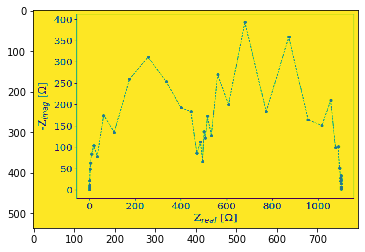

In [98]:
ploting_data(training_data, 200)

In [99]:
class Net(nn.Module):
    """Convolutional Neural Network Model"""
    def __init__(self, input_size, image_width, image_height,
                 firstHidden, kernel_size, output_size):
        """

        Parameters
        ----------
        input_size:
        image_width: The width of input images.
                     this is provided from the data_information function
        image_height: The width of input images.
                     this is provided from the data_information function
        firstHidden: The size of first hidden layer.
                     The size of next layer will be twice of the current layer
                     Ex: 1st is 8, 2nd will be 16, 3rd will be 24 and so on.
                     Number of hidden layer is set as 4 by default.
        kernel_size: It will form a subwindom with size of kernel to scan over
                     the original image.
                     kernel_size must be an odd integer,
                     usually not larger than 7
        output_size: The number of final target category.

        """
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(input_size, firstHidden, kernel_size)
        self.conv2 = nn.Conv2d(firstHidden, firstHidden*2, kernel_size)
        self.conv3 = nn.Conv2d(firstHidden*2, firstHidden*4, kernel_size)
        self.conv4 = nn.Conv2d(firstHidden*4, firstHidden*8, kernel_size)
        # Get size
        x = torch.randn(image_height, image_width).view(-1, 1, image_height,
                                                        image_width)
        conv_to_linear = self.last_conv_neuron(x)

        self.fc1 = nn.Linear(conv_to_linear, 64)
        self.fc2 = nn.Linear(64, output_size)

    def last_conv_neuron(self, x):
        """
        Calculate how many neurons that the last convolutional layer will
        connect to the linear hidden layer

        Parameters
        ----------
        x: a random torch tensor with size (-1, 1, image_height, image_width)
        Ex: x = torch.randn(image_height, image_width
                            ).view(-1, 1, image_height, image_width)
        """
        x = self.convs(x)
        conv_to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return conv_to_linear

    def convs(self, x):
        """
        Put the image into the convolutional hidden layer. Scan over the
        original image to and use the max pooling function (with size 2) to
        determine the one number to represent the sub-image.

        """
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv4(x)), (2, 2))
        return x

    def forward(self, x):
        """

        """
        x = self.convs(x)
        conv_to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        # Flatten the data
        xF = x.view(-1, conv_to_linear)
        # put into the first fully connected layer
        output = torch.sigmoid(self.fc1(xF))
        output = self.fc2(output)
        return F.softmax(output, dim=1)


In [100]:
net = Net(1,800, 536, 8, 3, 2) #(input_size, W,H,first hidden, kernel size,output size)
print(net)

Net(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=95232, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)


In [101]:
def image_to_tensor(training_data, image_height, image_width):
    """Transform the array image into tensor."""
    X = torch.Tensor([i[1] for i in training_data]
                     ).view(-1, image_height, image_width)
    return X/255.




In [102]:
X=image_to_tensor(training_data, 536, 800)
#X=X/255. #normalizing X

In [103]:
def type_to_tensor(training_data):
    """Transform the array type into tensor."""
    y = torch.Tensor([i[2] for i in training_data])
    return y

In [104]:
y=type_to_tensor(training_data)

In [105]:
#X = torch.Tensor([i[0] for i in training_data]).view(-1, 536, 800)
#X = X/255.0
#y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.2 # 20% for Testing
val_size = int(len(X)*VAL_PCT)
print(val_size)

257


In [106]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print("Training Sample:", len(train_X))
print("Testing Sample:", len(test_X))

Training Sample: 1028
Testing Sample: 257


In [107]:
type(train_X)

torch.Tensor

In [108]:

def data_separation(data, ratio_of_testing, TRAIN):
    """Separate the training and testing data."""
    VAL_PCT = ratio_of_testing
    val_size = int(len(data)*VAL_PCT)

    if TRAIN is True:
        train_data = data[:-val_size]
        print("Training Samples:", len(train_data))
        return train_data
    test_data = data[-val_size:]
    print("Testing Samples:", len(test_data))
    return test_data




In [109]:
ratio_of_testing=0.2
test_data=data_separation(X, ratio_of_testing, train_X)

Testing Samples: 257


In [110]:
def learning(train_data1, train_data2, input_size, image_width, image_height,
             firstHidden, kernel_size, output_size, learning_rate, BATCH_SIZE,
             EPOCHS):
    """
    parameter
    ---------
    train_data1 = X_train [image data]
    train_data2 = y_train [type data]
    input_size = 1
    image_width, image_height = same as the ones defined for preprocessing
    firstHidden = 8, typically
    kernel_size = 4
    output_size = 2 [0=bad, 1=pass]
    learning_rate = 0.001 at default for pytorch
    BATCH_SIZE = 10 the number of images used for training at a time
    EPOCHS = 1
    """
    optimizer = optim.Adam(Net(input_size, image_width, image_height,
                               firstHidden, kernel_size, output_size
                               ).parameters(), lr=learning_rate) 
    loss_function = nn.L1Loss() #L1Loss() used for our model (complicated cnn model)

    for epoch in range(EPOCHS):
        for i in tqdm(range(0, len(train_data1), BATCH_SIZE)):
            batch_data1 = train_data1[i:i+BATCH_SIZE].view(-1, 1,
                                                           image_height,
                                                           image_width)
            batch_data2 = train_data2[i:i+BATCH_SIZE]

            Net(input_size, image_width, image_height, firstHidden,
                kernel_size, output_size).zero_grad()
            outputs = Net(input_size, image_width, image_height, firstHidden,
                          kernel_size, output_size)(batch_data1)
            loss = loss_function(outputs, batch_data2)
            loss.backward()
            optimizer.step()

        print(loss)




In [111]:
loss = learning(train_X, train_y, 1, 800, 536, 8, 4, 2, 0.001, 10, 1)

100%|██████████| 103/103 [08:32<00:00,  4.98s/it]

tensor(0.5772, grad_fn=<L1LossBackward>)


In [113]:
def accuracy(test_data1, test_data2, input_size, image_width, image_height,
             firstHidden, kernel_size, output_size):
    """

    """
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_data1))):
            real_type = torch.argmax(test_data2[i])
            net_out_train = Net(input_size, image_width, image_height,
                                firstHidden, kernel_size, output_size
                                )(test_data1[i].view(-1, 1, image_height,
                                                     image_width))[0]
            predicted_type = torch.argmax(net_out_train)

            if predicted_type == real_type:
                correct += 1
            total += 1

    print("Accuracy:", round(correct/total, 3))



In [112]:
accuracy = accuracy(test_X, test_y, 1, 800, 536,
             8, 4, 2)

NameError: name 'accuracy' is not defined

In [116]:
def type_prediction(k, path_List_training, tensor_data, array_data,
                    input_size, image_width, image_height, firstHidden,
                    kernel_size, output_size, detailed_information):
    """
    Predict which type the input image is and print out the total number of
    each type.
    (Optional) Print out the predicted type and file name for each image.
    Parameters
    ----------
    k
    path
    Same as the parameters of nn model
    input_size
    image_width: The target width after resize
    image_height: The target height after resize
    firstHidden: The size of first hidden layer.
    kernel_size: It will form a subwindom with size of kernel to scan over
                 the original image.
    output_size: The number of final target type.
    detailed information: Show the predicted type and file
                          name for each image or not
    """
    countImage_predicted_type = [0, 0, 0, 0, 0, 0, 0]
    for i in range(len(Input_data)):
        net_out_predict = Net(input_size, image_width, image_height,
                              firstHidden, kernel_size, output_size
                              )(Input_data[i].view(-1, 1, image_height,
                                                   image_width))[0]
        predicted_type = torch.argmax(net_out_predict)
        for Type in range(k):
            if predicted_type == 0:
                countImage_predicted_type[Type] += 1
                # Print out the detailed information.
                if detailed_information is True:
                    print("Warning! Type Prediction:", path_List_training[Type])
                    print("Path and File Name", array_data[i][0])
            else:
                countImage_predicted_type[Type] += 1
                

    for i in range(len(path_List_training)-1):
        print(path_List_training[i], ":", countImage_predicted_type[i])

In [ ]:
print(training_data[0])

In [117]:
path_List_training= [NS, SH]
k=len(path_List_training)-1
Input_data=X
np_array_data=training_data
input_size=1
image_width=800
image_height=536
firstHidden=8
kernel_size=4
output_size=2
detailed= True
type_prediction(k, path_List_training, Input_data, np_array_data,
                    input_size, image_width, image_height, firstHidden,
                    kernel_size, output_size,detailed)

Warning! Type Prediction: /Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy
Path and File Name /Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy/200315-0427_sim_spread-True.png
Warning! Type Prediction: /Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy
Path and File Name /Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy/200315-0185_randles_simp-True.png
Warning! Type Prediction: /Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy
Path and File Name /Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy/200315-0200_sim_spread-True.png
Warning! Type Prediction: /Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy
Path and File Name /Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy/200315-0681_sim_spread-True.png
Warning! Type Prediction: /Users/mkim91/Desktop/Direct/Eisy_as_py/eisy/cnn/Neural_Network/Noisy
Path and File Name /Users/mkim91/D

KeyboardInterrupt: 